# Preamble

**Definition and Properties of a selection matrix** A selection matrix $S_1=S(m_1,n)$ is a full row rank matrix composed of 0, -1 and 1 with at most one non-zero value per column and one, and only one, non-null value per row. It satisfies:
$$ 
S_1\times S_1^T = I_{m_1}
$$
Moreover, $S_2=S_2(m_2,n)$ ($m_1 + m_2 \le n$) is a complementary selection matrix if it satisfies: $S_1 S_2^T=S_2 S_1^T=0$.

$\{S_1,S_2,\dots,S_p\}$ is a set of partitioning matrices if
* $S_i$ is a selection matrix $\forall i \in \{1,\dots,p\}$
* $\forall i\neq j$, $S_j$ is complementary to $S_i$
* $\sum_i m_i = n$

Therefore, the partioning matrices $\{S_i\}$ satisfy:
  $$
    \begin{bmatrix}S_1 \\ S_2 \\ \dots \\ S_p\end{bmatrix} \times \begin{bmatrix}S_1^T & S_2^T & \dots & S_p^T \end{bmatrix} = I_n
  $$

$S_1 X = Y \leftrightarrow X = S_1^T Y$.

**Capacitance assumption:** All the capacitances are modelled by:
$$ 
C_i\frac{d}{dt}\tau_i = \varphi_i
$$
with $\tau_i \in T$.


# Problem statement

Let $T$ be the vector of the $n$ temperatures appearing in nodes. Let's define a triplet pf partitionning matrices:

$$
\begin{bmatrix} T_{in} \\ \bar T_{in}\end{bmatrix} =
\begin{bmatrix}  S_{in} \\ \bar S_{in} \end{bmatrix} T
\leftrightarrow 
T =  S_{in}^T T_{in} + \bar S_{in}^T \bar T_{in}
$$
with $S_{in} (n_{in},n)$ and $\bar S_{in} (n-n_{in},n)$, partitionning matrices.

It yields:
$$
T_{state} \\ T_{out} =
\begin{bmatrix}  S_{state} \\ S_{out}\end{bmatrix} \bar T_{in}
\leftrightarrow 
\bar T_{in}=S_{state}^T T_{state} + S_{out}^T T_{out}
$$
with $S_{state} (n_{state},n)$, $S_{out} (n_{out},n)$, $S_{out} (n-n_{state}-n_{out},n)$, partitionning matrices.

- $T_{in}$ gathers known temperatures
- $T_{state}$ gathers temperatures with derivations
- $T_{out}$ gathers temperatures whose values must be estimated
- $T_{rem}$ gathers remaining temperatures without much interest

It can be rewritten as:
$$
T =  S_{in}^T T_{in} + S_{state}^T T_{state} + S_{out}^T T_{out}
$$

Temperature tranformation for component delta temperatures $e_R$ (dimension $n_R$) and $e_C$ (dimension $n_{state}$):
$$
e_{R}=\mathcal M_{R}T \\
e_{C}=\mathcal M_{C}T = \mathcal M_{C} S_{state}^T T_{state}
$$
with 
$\mathcal M_{R} = \mathcal M_{R}(n_R,n)$ and $\mathcal M_{C} = \mathcal M_{C}(n_{state},n)$.

Resistance model with $\mathcal R= \mathcal R(n_R, n_R)$ diagonal and invertible
$$
\mathcal R\varphi_R=e_R
$$
Capacitance model $\mathcal C= \mathcal C(n_{state}, n_{state})$ diagonal and invertible:
$$
\mathcal C\frac{de_C}{dt}=\varphi_C
$$
Heat balance at each node
$$
\Gamma_R \varphi_R + \Gamma_C \varphi_C = \Gamma_P\varphi_P
$$
with $\Gamma_R = \Gamma_R(n_B,n_R)$, $\Gamma_C = \Gamma_C(n_B,n_{state})$ and $\Gamma_P = \Gamma_P(n_B,n_P)$.
Because capacitances are necessary bound to the 0 reference temperature, each capacitance can be involved in one, and only one power balance node. It comes out that $\Gamma_C^T$ is a selection matrix. 

Regarding $\Gamma_R$, each resistance can be involved either in one node balance (when connected to the 0 reference temperature) or to 2 node balances, and there is one and only one heat flow per thermal resistance. Therefore, $\Gamma_R$ is necessary full row rank. 

# Static Problem

## Static problem example

1
{'A': None, 'B_Tin': None, 'B_heat': None, 'C': None, 'D_Tin': Matrix([[0.654515327257663, 0.0182270091135046]]), 'D_heat': Matrix([[-0.00143993371996686]]), 'Y': ['Tin'], 'X': None, 'U_Tin': ['Tcor', 'Tout'], 'U_heat': ['Pin'], 'type': 'static'}



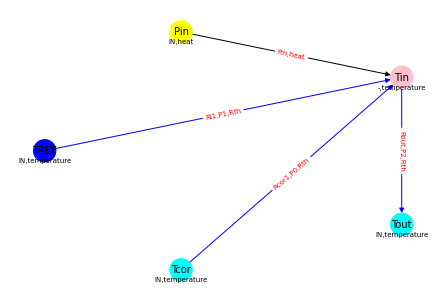

In [1]:
from sqlalchemy import false, true
from buildingenergy.thermalstatespace import *
from sympy import substitution, symbols, Matrix, zeros, pprint, eye, simplify, factor, cancel
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

net = ThermalNetwork()
net.T('Tcor', CAUSALITY.IN) 
net.T('Tout', CAUSALITY.IN)

net.R(fromT='Tcor', toT='Tin', name='Rcor1', value=0.0022)
net.R(toT='Tin', name='Ri1', value=0.0044)
net.R(fromT='Tin', toT='Tout', name='Rout', value=0.079)
net.HEAT(T='Tin', name='Pin')

# net.T('tau1')
# net.T('tau2')
# net.T('Tint')
# net.R(fromT='Tcor', toT='Tin', name='Rvent', value=0.0022)
# net.R(fromT='Tcor', toT='Tint', name='Rcor1', value=0.0022)
# net.R(fromT='Tint', toT='Tin', name='Rcor2', value=0.0022)
# net.R(toT='tau1', name='Ri1', value=0.0044)
# net.R(fromT='tau1', toT='Tin', name='Ri1p', value=0.0044)
# net.R(toT='tau2', name='Ri2', value=0.0039)
# net.R('tau2', toT='Tin', name='Ri2p', value=0.0039)
# net.R(toT='Tin', name='Rair', value=0.06)
# net.R(fromT='Tin', toT='Tout', name='Rout', value=0.079)
# net.HEAT(T='Tin', name='Pin')

print(net.state_model())
net.draw()
print()

1
{'A': None, 'B_Tin': None, 'B_heat': None, 'C': None, 'D_Tin': Matrix([
[ 0.909090590909389, 0.0909089090911711],
[ 0.818181272727837,  0.181817827273234],
[ 0.727272036364409,  0.272726763637079],
[ 0.636362872728185,  0.363635727273599],
[ 0.545453772728241,  0.454544727273689],
[  0.45454472727368,  0.545453772728252],
[  0.36363572727359,  0.636362872728185],
[ 0.272726763637073,  0.727272036364413],
[ 0.181817827273228,  0.818181272727839],
[0.0909089090911673,   0.90909059090939]]), 'D_heat': Matrix(0, 0, []), 'Y': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10'], 'X': None, 'U_Tin': ['T0', 'Tn'], 'U_heat': [], 'type': 'static'}



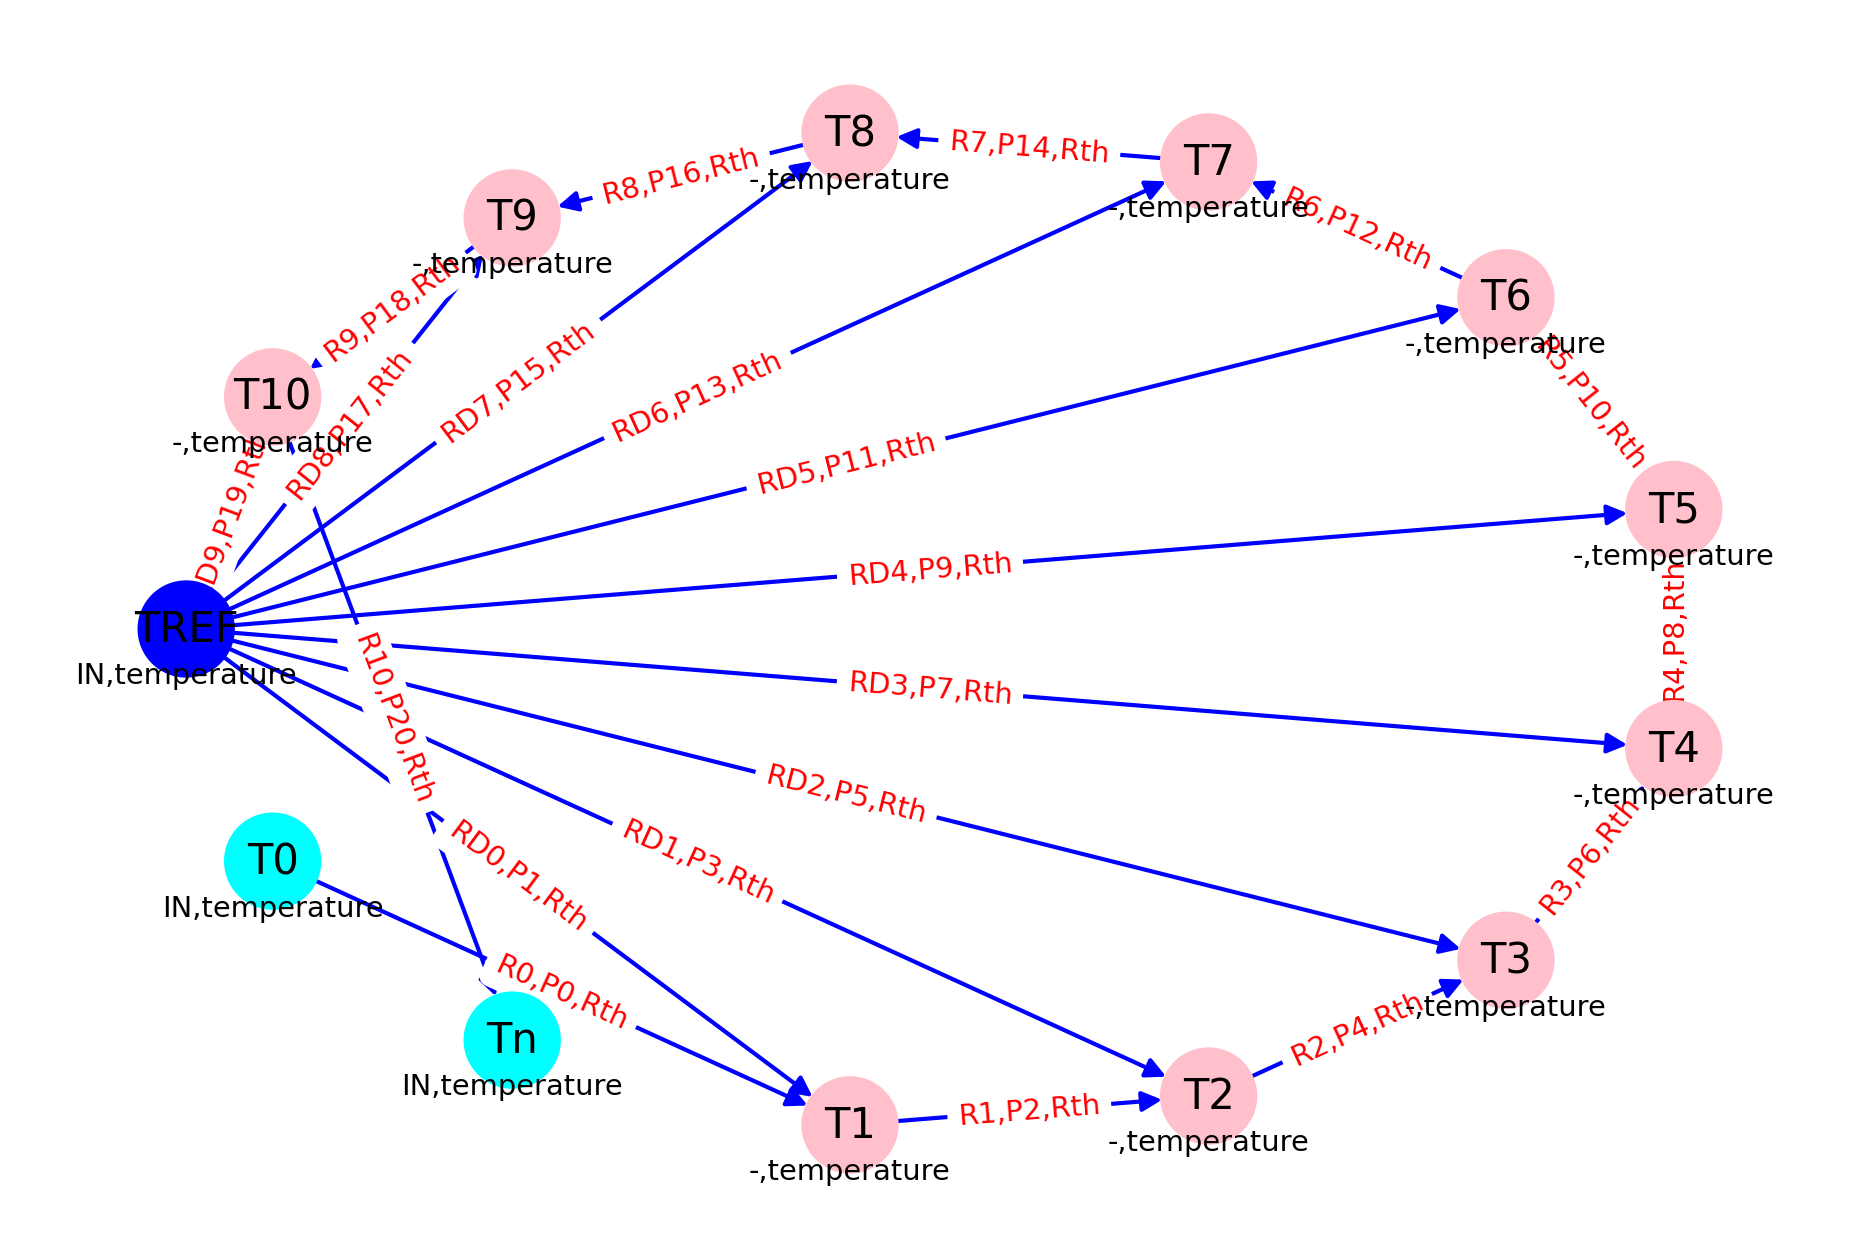

In [2]:
from sqlalchemy import false, true
from buildingenergy.thermalstatespace import *
from sympy import substitution, symbols, Matrix, zeros, pprint, eye, simplify, factor, cancel
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

net = ThermalNetwork()
net.T('T0', CAUSALITY.IN) 
net.T('Tn', CAUSALITY.IN)

n_layers = 10
for i in range(n_layers):
    net.R(fromT='T%i'%(i), toT='T%i'%(i+1), name='R%i'%(i), value=0.001/n_layers)
    net.R(toT= 'T%i'%(i+1), name='RD%i'%(i), value = 10000/n_layers)
net.R(fromT='T%i'%(n_layers), toT='Tn', name='R%i'%(i+1), value=0.001/n_layers)

print(net.state_model())
net.draw()
print()

## Solving the static problem

Because there are no capacitance in a static problem, we have:
$$
T =  S_{in}^T T_{in} + S_{out}^T T_{out}\\
e_{R}=\mathcal M_{R}T \\
\mathcal R\varphi_R=e_R \\
\Gamma_R \varphi_R = \Gamma_P\varphi_P\\
\varphi_R=\mathcal R^{-1}e_R=\mathcal R^{-1}\mathcal M_R T\\
$$

Therefore,
$$
\Gamma_R \mathcal R^{-1} \mathcal M_R  S_{out}^T T_{out} = \Gamma_P\varphi_P - \Gamma_R \mathcal R^{-1} \mathcal M_R S_{in}^T T_{in}
$$
Let $\Psi_R$ be defined by $\Psi_R=\Gamma_R \mathcal R^{-1} \mathcal M_R$.
Previous equality can be rewritten as:
$$
\Psi_RS_{out}^T T_{out} = \Gamma_P\varphi_P - \Psi_R S_{in}^T T_{in}
$$
If $\Psi_R  S_{out}^T$ $(n_B\times n_{out})$ is full column rank (in particular, $n_B > n_{out}$), it leads to:

$$
 T_{out} = - (\Psi_R S_{out}^T)^+ \Psi_R S_{in}^T T_{in} + (\Psi_R S_{out}^T)^+\Gamma_P\varphi_P
$$

### Heatflow static equation

We have $\varphi_R = \mathcal R^{-1} \mathcal M_R T$ with $T=S_{in}^T T_{in} + S_{out}^T T_{out}$.

Therefore,
$$
\varphi_R = \mathcal R^{-1} \mathcal M_R S_{in}^T T_{in} + \mathcal R^{-1} \mathcal M_R S_{out}^T T_{out}
$$

Using the previous output equation to remove $T_{out}$ yields:
$$
\varphi_R = \mathcal R^{-1} \mathcal M_R (I_n - S_{out}^T  (\Psi_R S_{out}^T)^+ \Psi_R) S_{in}^T T_{in} +
  \mathcal R^{-1} \mathcal M_R S_{out}^T (\Psi_R S_{out}^T)^+\Gamma_P\varphi_P
$$


# Dynamic problem 

## Dynamic problem example

00:56 LTIPGReductor: Operator projection ...
00:56 LTIPGReductor: Building ROM ...


A
[-0.0191360046939012]
B_Tin
[0.109907335687611  0.00170039478560299]
B_heat
[0.000134331188062636]
C
[0.109920570528197]
D_Tin
[0  0]
D_heat
[0]
Y
[Tin]
X
[X0]
U_Tin
[Tcor, Tout]
U_heat
[Pin]
type
differential



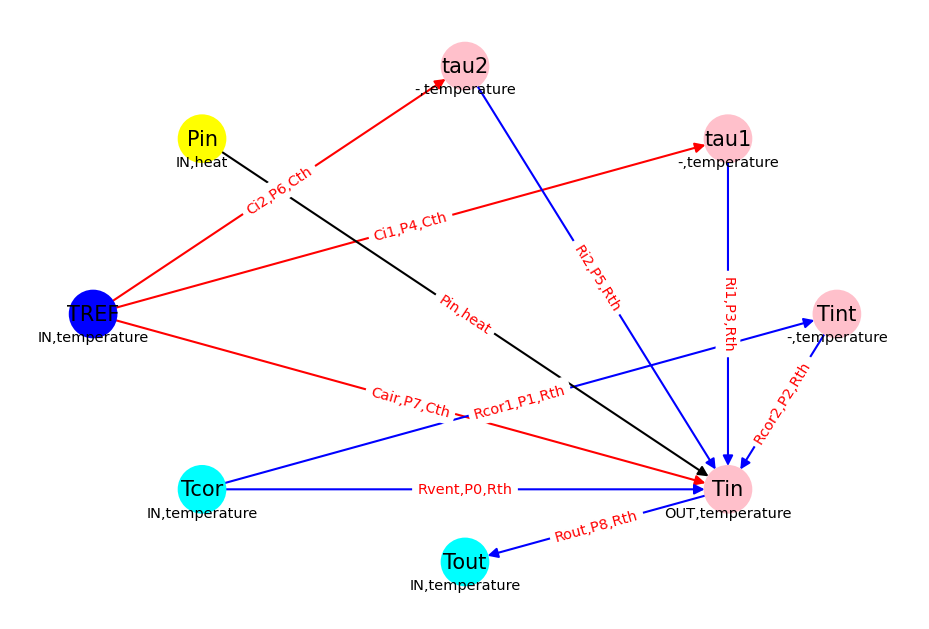

In [4]:
from sqlalchemy import false, true
from buildingenergy.thermalstatespace import *
from sympy import substitution, symbols, Matrix, zeros, pprint, eye, simplify, factor, cancel
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

net = ThermalNetwork()
net.T('Tcor', CAUSALITY.IN)
net.T('Tout', CAUSALITY.IN)
net.T('Tin', CAUSALITY.OUT)

# net.T('Tint')
net.R(fromT='Tcor', toT='Tin', name='Rvent', value=0.0022)
net.R(fromT='Tcor', toT='Tint', name='Rcor1', value=0.0022)
net.R(fromT='Tint', toT='Tin', name='Rcor2', value=0.0022)
net.R(fromT='tau1', toT='Tin', name='Ri1', value=0.0044)
net.C(toT='tau1', name='Ci1', value=14961871)
net.R(fromT='tau2', toT='Tin', name='Ri2', value=0.0039)
net.C(toT='tau2', name='Ci2', value=667938)
net.C(toT='Tin', name='Cair', value=66793)
net.R(fromT='Tin', toT='Tout', name='Rout', value=0.079)
net.HEAT(T='Tin', name='Pin')

# net.R('Tcor', 'Tin', name='Rcor')#, value=0.001)
# net.R('Tout', 'Tin', name='Rout')#, value=0.001)
# net.C('Tin', name='Cair')#, value=150000)
# net.HEAT('Tin', name='Pin')

smodel = net.state_model(order=1)
for k in smodel:
    if isinstance(k, Matrix):
        print(k), pprint(smodel[k])
    else:
        print(k), pprint(smodel[k])
        
net.draw()
print()

## Dynamic problem solving

We have:
$$
e_{R}=\mathcal M_{R} S_{in}^T T_{in} + \mathcal M_{R} S_{state}^T T_{state} + \mathcal M_{R} S_{out}^T T_{out} \\
e_{C}=\mathcal M_{C} \bar S_{int}^T S_{state}^T T_{state}\\
\mathcal R\varphi_R=e_R \\
\mathcal C\frac{de_C}{dt}=\varphi_C\\
\Gamma_R \varphi_R + \Gamma_C \varphi_C = \Gamma_P\varphi_P 
$$

With $\Psi_R=\Gamma_R \mathcal R^{-1} \mathcal M_R$ and $\Psi_C = \Gamma_C \mathcal C \mathcal M_{C}$, it can be rewritten as:
$$
\Psi_R S_{in}^T T_{in} + \Psi_R  S_{state}^T T_{state} + \Psi_R S_{out}^T T_{out} + \Psi_C S_{state}^T  \frac{d T_{state}}{dt} = \Gamma_P\varphi_P 
$$

### Output dynamic equation

Multiplying by $\overline{S_{state} \Psi_C^T}$ on the left to remove the derivatives and get the output equation leads to:
$$
\Psi_R S_{in}^T T_{in} + \Psi_R  S_{state}^T T_{state} + \Psi_R S_{out}^T T_{out} + \Psi_C S_{state}^T  \frac{d T_{state}}{dt} = \Gamma_P\varphi_P 
$$

$$
\overline{S_{state}\Psi_C^T} \Psi_R S_{out}^T T_{out} = - \overline{S_{state}\Psi_C^T} \Psi_R  S_{state}^T T_{state}  - \overline{S_{state}\Psi_C^T} \Psi_R S_{in}^T T_{in} + \overline{S_{state}\Psi_C^T} \Gamma_P\varphi_P 
$$
with $\Phi = \overline{S_{state}\Psi_C^T} \Psi_R S_{out}^T$.
It leads to the output equation:
$$
T_{out} = - \Phi^+ \overline{S_{state}\Psi_C^T} \Psi_R  S_{state}^T T_{state}  - \Phi^+\overline{S_{state}\Psi_C^T} \Psi_R S_{in}^T T_{in} + \Phi^+\overline{S_{state}\Psi_C^T} \Gamma_P\varphi_P 
$$


### State equation

Let's now focus on the state equation:
$$
\Psi_C S_{state}^T  \frac{d T_{state}}{dt} = -\Psi_R  S_{state}^T T_{state} - \Psi_R S_{in}^T T_{in} -   \Psi_R S_{out}^T T_{out} + \Gamma_P\varphi_P 
$$

The derivative must be isolated by multiplying by $(\Psi_C S_{state}^T)^+$ :
$$
\frac{d T_{state}}{dt} = -(\Psi_C S_{state}^T)^+\Psi_R  S_{state}^T T_{state} 
- (\Psi_C S_{state}^T)^+\Psi_R S_{in}^T T_{in} 
- (\Psi_C S_{state}^T)^+ \Psi_R S_{out}^T T_{out}
+ (\Psi_C S_{state}^T)^+ \Gamma_P\varphi_P 
$$ 

Let $\Pi=(\Psi_C S_{state}^T)^+ ( I_n - \Psi_R S_{out}^T \Phi^+ \overline{S_{state}\Psi_C^T})$,  $T_{out}$ is removed using the observation equation:
$$
\frac{d T_{state}}{dt} = 
- \Pi \Psi_R  S_{state}^T T_{state} 
- \Pi \Psi_R S_{in}^T T_{in} 
+ \Pi \Gamma_P\varphi_P 
$$ 



### Heatflow dynamic equation

We have $\varphi_R = \mathcal R^{-1} \mathcal M_R T$ with $T=S_{in}^T T_{in} + S_{state}^T T_{state} + S_{out}^T T_{out}$.

Therefore,
$$
\varphi_R = \mathcal R^{-1} \mathcal M_R S_{state}^T T_{state} + \mathcal R^{-1} \mathcal M_R S_{in}^T T_{in} + \mathcal R^{-1} \mathcal M_R S_{out}^T T_{out}
$$

Using the output equation to remove $T_{out}$ yields:
$$
\varphi_R = 
\mathcal R^{-1} \mathcal M_R (I + S_{out}^T \Phi^+ \overline{S_{state}\Psi_C^T} \Psi_R ) S_{state}^T T_{state} \dots\\
+ \mathcal R^{-1} \mathcal M_R (I + S_{out}^T \Phi^+\overline{S_{state}\Psi_C^T} \Psi_R) S_{in}^T T_{in} \dots\\
- \mathcal R^{-1} \mathcal M_R S_{out}^T \Phi^+\overline{S_{state}\Psi_C^T} \Gamma_P\varphi_P 
$$

We have also $\varphi_C = \mathcal C \mathcal M_C S_{state} \frac{d T_{state}}{dt}$. Introducing the state differential equation yields:
$$
\varphi_C = - \mathcal C \mathcal M_C S_{state}^T \Pi \Psi_R  S_{state}^T T_{state} 
- \mathcal C \mathcal M_C S_{state}^T \Pi \Psi_R S_{in}^T T_{in} 
+ \mathcal C \mathcal M_C S_{state}^T \Pi \Gamma_P\varphi_P
$$

# load test

00:02 LTIPGReductor: Operator projection ...
00:02 LTIPGReductor: Building ROM ...


1
2
A Matrix([[-20.0000000000000, 10.0000000000000, 0, 0, 0, 0, 0, 0, 0, 0], [10.0000000000000, -20.0000000000000, 10.0000000000000, 0, 0, 0, 0, 0, 0, 0], [0, 10.0000000000000, -20.0000000000000, 10.0000000000000, 0, 0, 0, 0, 0, 0], [0, 0, 10.0000000000000, -20.0000000000000, 10.0000000000000, 0, 0, 0, 0, 0], [0, 0, 0, 10.0000000000000, -20.0000000000000, 10.0000000000000, 0, 0, 0, 0], [0, 0, 0, 0, 10.0000000000000, -20.0000000000000, 10.0000000000000, 0, 0, 0], [0, 0, 0, 0, 0, 10.0000000000000, -20.0000000000000, 10.0000000000000, 0, 0], [0, 0, 0, 0, 0, 0, 10.0000000000000, -20.0000000000000, 10.0000000000000, 0], [0, 0, 0, 0, 0, 0, 0, 10.0000000000000, -20.0000000000000, 10.0000000000000], [0, 0, 0, 0, 0, 0, 0, 0, 10.0000000000000, -20.0000000000000]])
{'A': Matrix([[-0.452474281304075]]), 'B_Tin': Matrix([[0.48831308999553, 0.362166383559087]]), 'B_heat': Matrix(0, 0, []), 'C': Matrix([[0.607959014441969]]), 'D_Tin': Matrix([[0, 0]]), 'D_heat': Matrix(0, 0, []), 'Y': ['T5'], 'X': ['

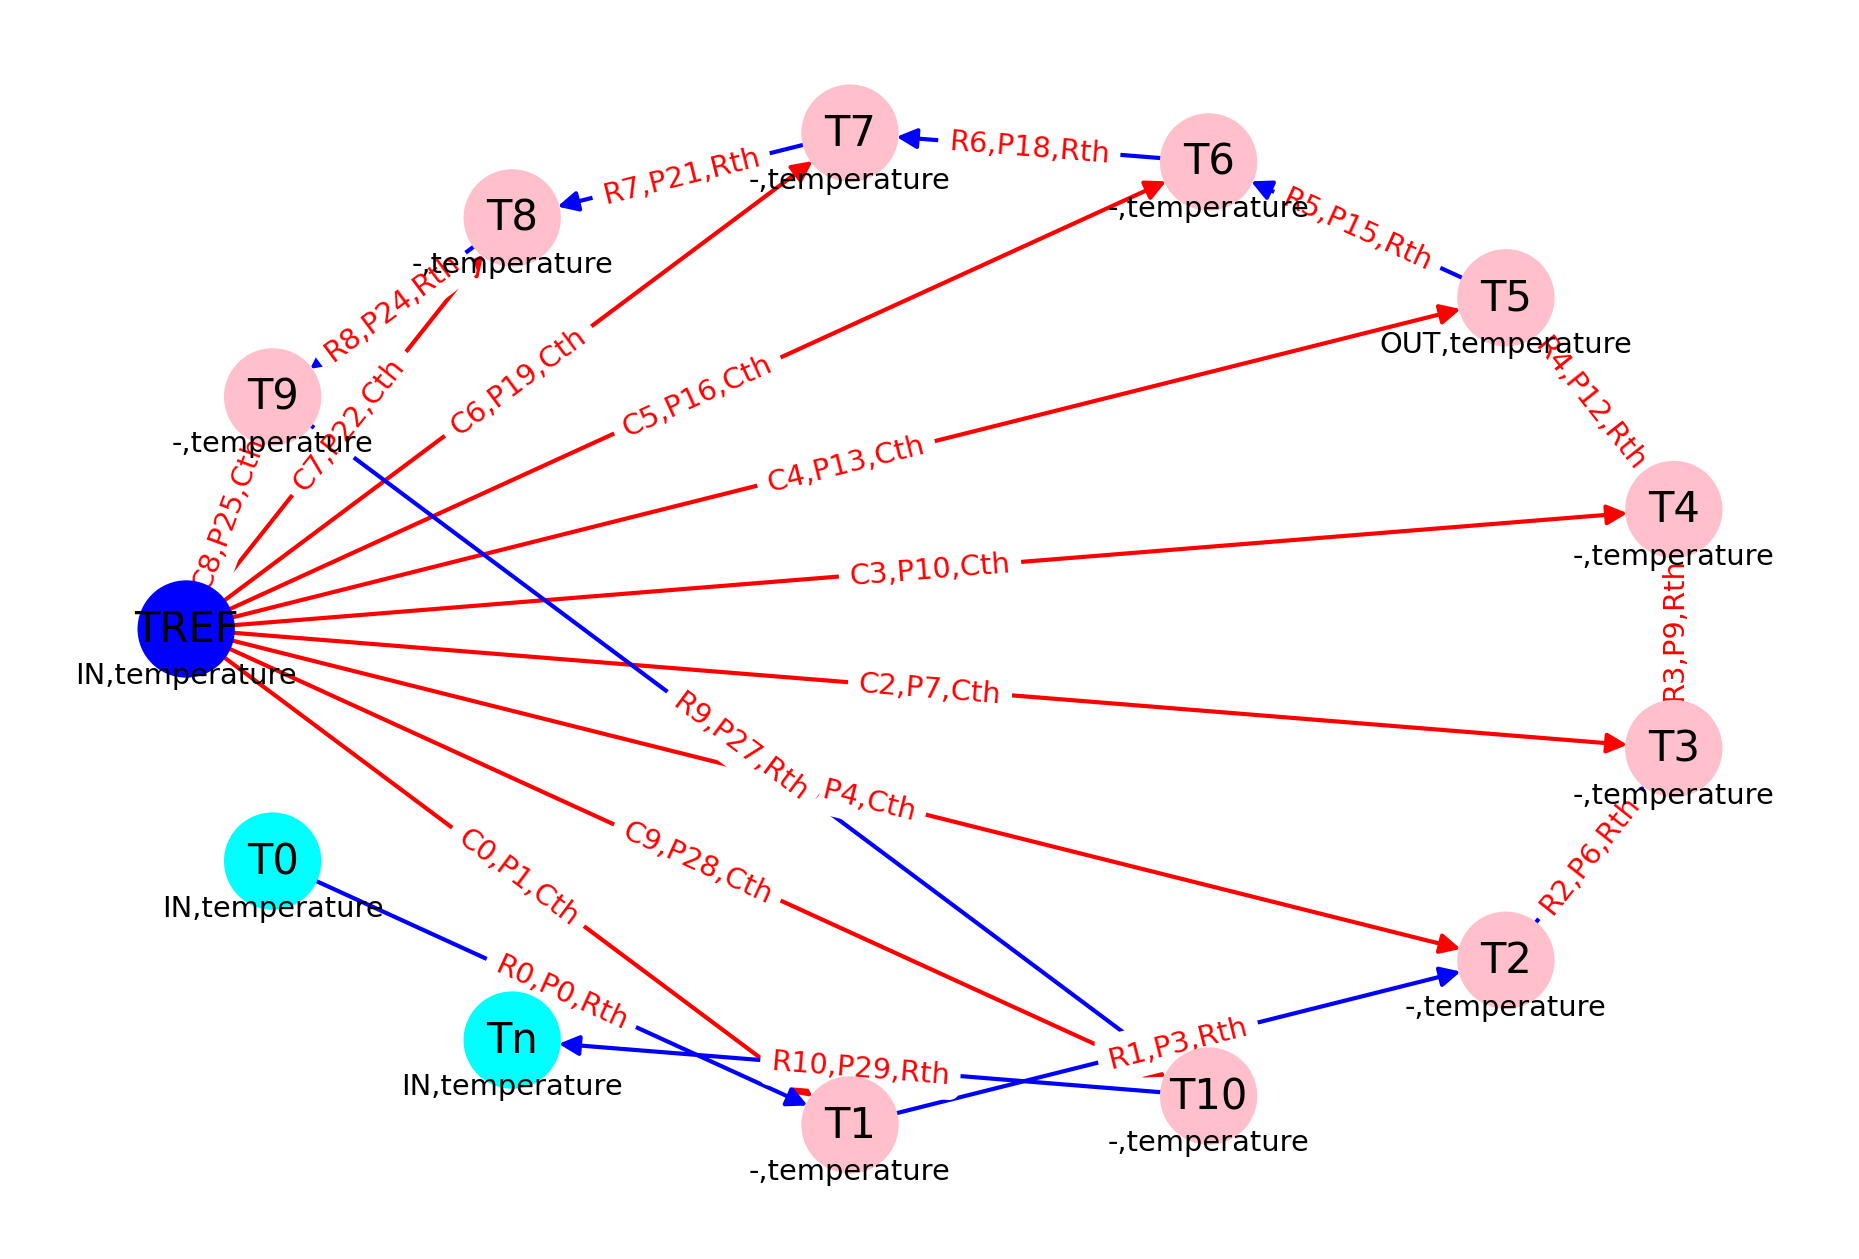

In [4]:
from sqlalchemy import false, true
from buildingenergy.thermalstatespace import *
from sympy import substitution, symbols, Matrix, zeros, pprint, eye, simplify, factor, cancel
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

net = ThermalNetwork()
net.T('T0', CAUSALITY.IN) 
net.T('Tn', CAUSALITY.IN)

n_layers = 10
for i in range(n_layers):
    if i == int(n_layers/2):
        net.T('T%i'%(i), CAUSALITY.OUT)
    net.R(fromT='T%i'%(i), toT='T%i'%(i+1), name='R%i'%(i), value=0.001/n_layers)
    net.C(toT= 'T%i'%(i+1), name='C%i'%(i), value = 10000/n_layers)
    net.R(fromT='T%i'%(n_layers), toT='Tn', name='R%i'%(i+1), value=0.001/n_layers)

smodel = net.state_model(order=1)
for k in smodel:
    if isinstance(k, Matrix):
        print(k), pprint(smodel[k])
    else:
        print(k), pprint(smodel[k])
        
net.draw()
print()

# Selection of output

We had:

$$
T_{state} \\ T_{out} =
\begin{bmatrix}  S_{state} \\ S_{out}\end{bmatrix} \bar T_{in}
\leftrightarrow 
\bar T_{in}=S_{state}^T T_{state} + S_{out}^T T_{out}
$$
with $S_{state} (n_{state},n)$, $S_{out} (n_{out},n)$, $S_{out} (n-n_{state}-n_{in},n)$, partitionning matrices.

We are interested in $T_{sel}\subset T_{out}$ i.e. $T_{sel} = S_{sel}T{out}$ with $S_{sel} (n_{sel}, n-n_{state}-n_{in})$

